My goal is to complete the tasks below based off the 538 article and reach a similar conclusion. 

I will use my pandas and seaborn and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

Make sure you read this article : 
Be Suspicious Of Online Movie Ratings, Especially Fandango’s https://fivethirtyeight.com/features/fandango-movies-ratings/
Also available on https://github.com/fivethirtyeight/data 

After reading the article, read these two tables giving an overview of the two .csv files we will be working with:


There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

all_sites_scores.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column Definition
FILM: The film in question
RottenTomatoes:  The Rotten Tomatoes Tomatometer score for the film
RottenTomatoes_User: The Rotten Tomatoes user score for the film
Metacritic: The Metacritic critic score for the film
Metacritic_User: The Metacritic user score for the film
IMDB: The IMDb user score for the film
Metacritic_user_vote_count: The number of user votes the film had on Metacritic
IMDB_user_vote_count: The number of user votes the film had on IMDb


fandango_scape.csv
fandango_scrape.csv contains every film 538 pulled from Fandango


Column: Definiton
FILM: The movie
STARS: Number of stars presented on Fandango.com
RATING: The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES: number of people who had reviewed the film at the time we pulled it.


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the first dataset stored in a csv file
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
# get the last five datasets
fandango.tail()

,FILM,STARS,RATING,VOTES
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0
503,Zarafa (2012),0.0,0.0,0


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

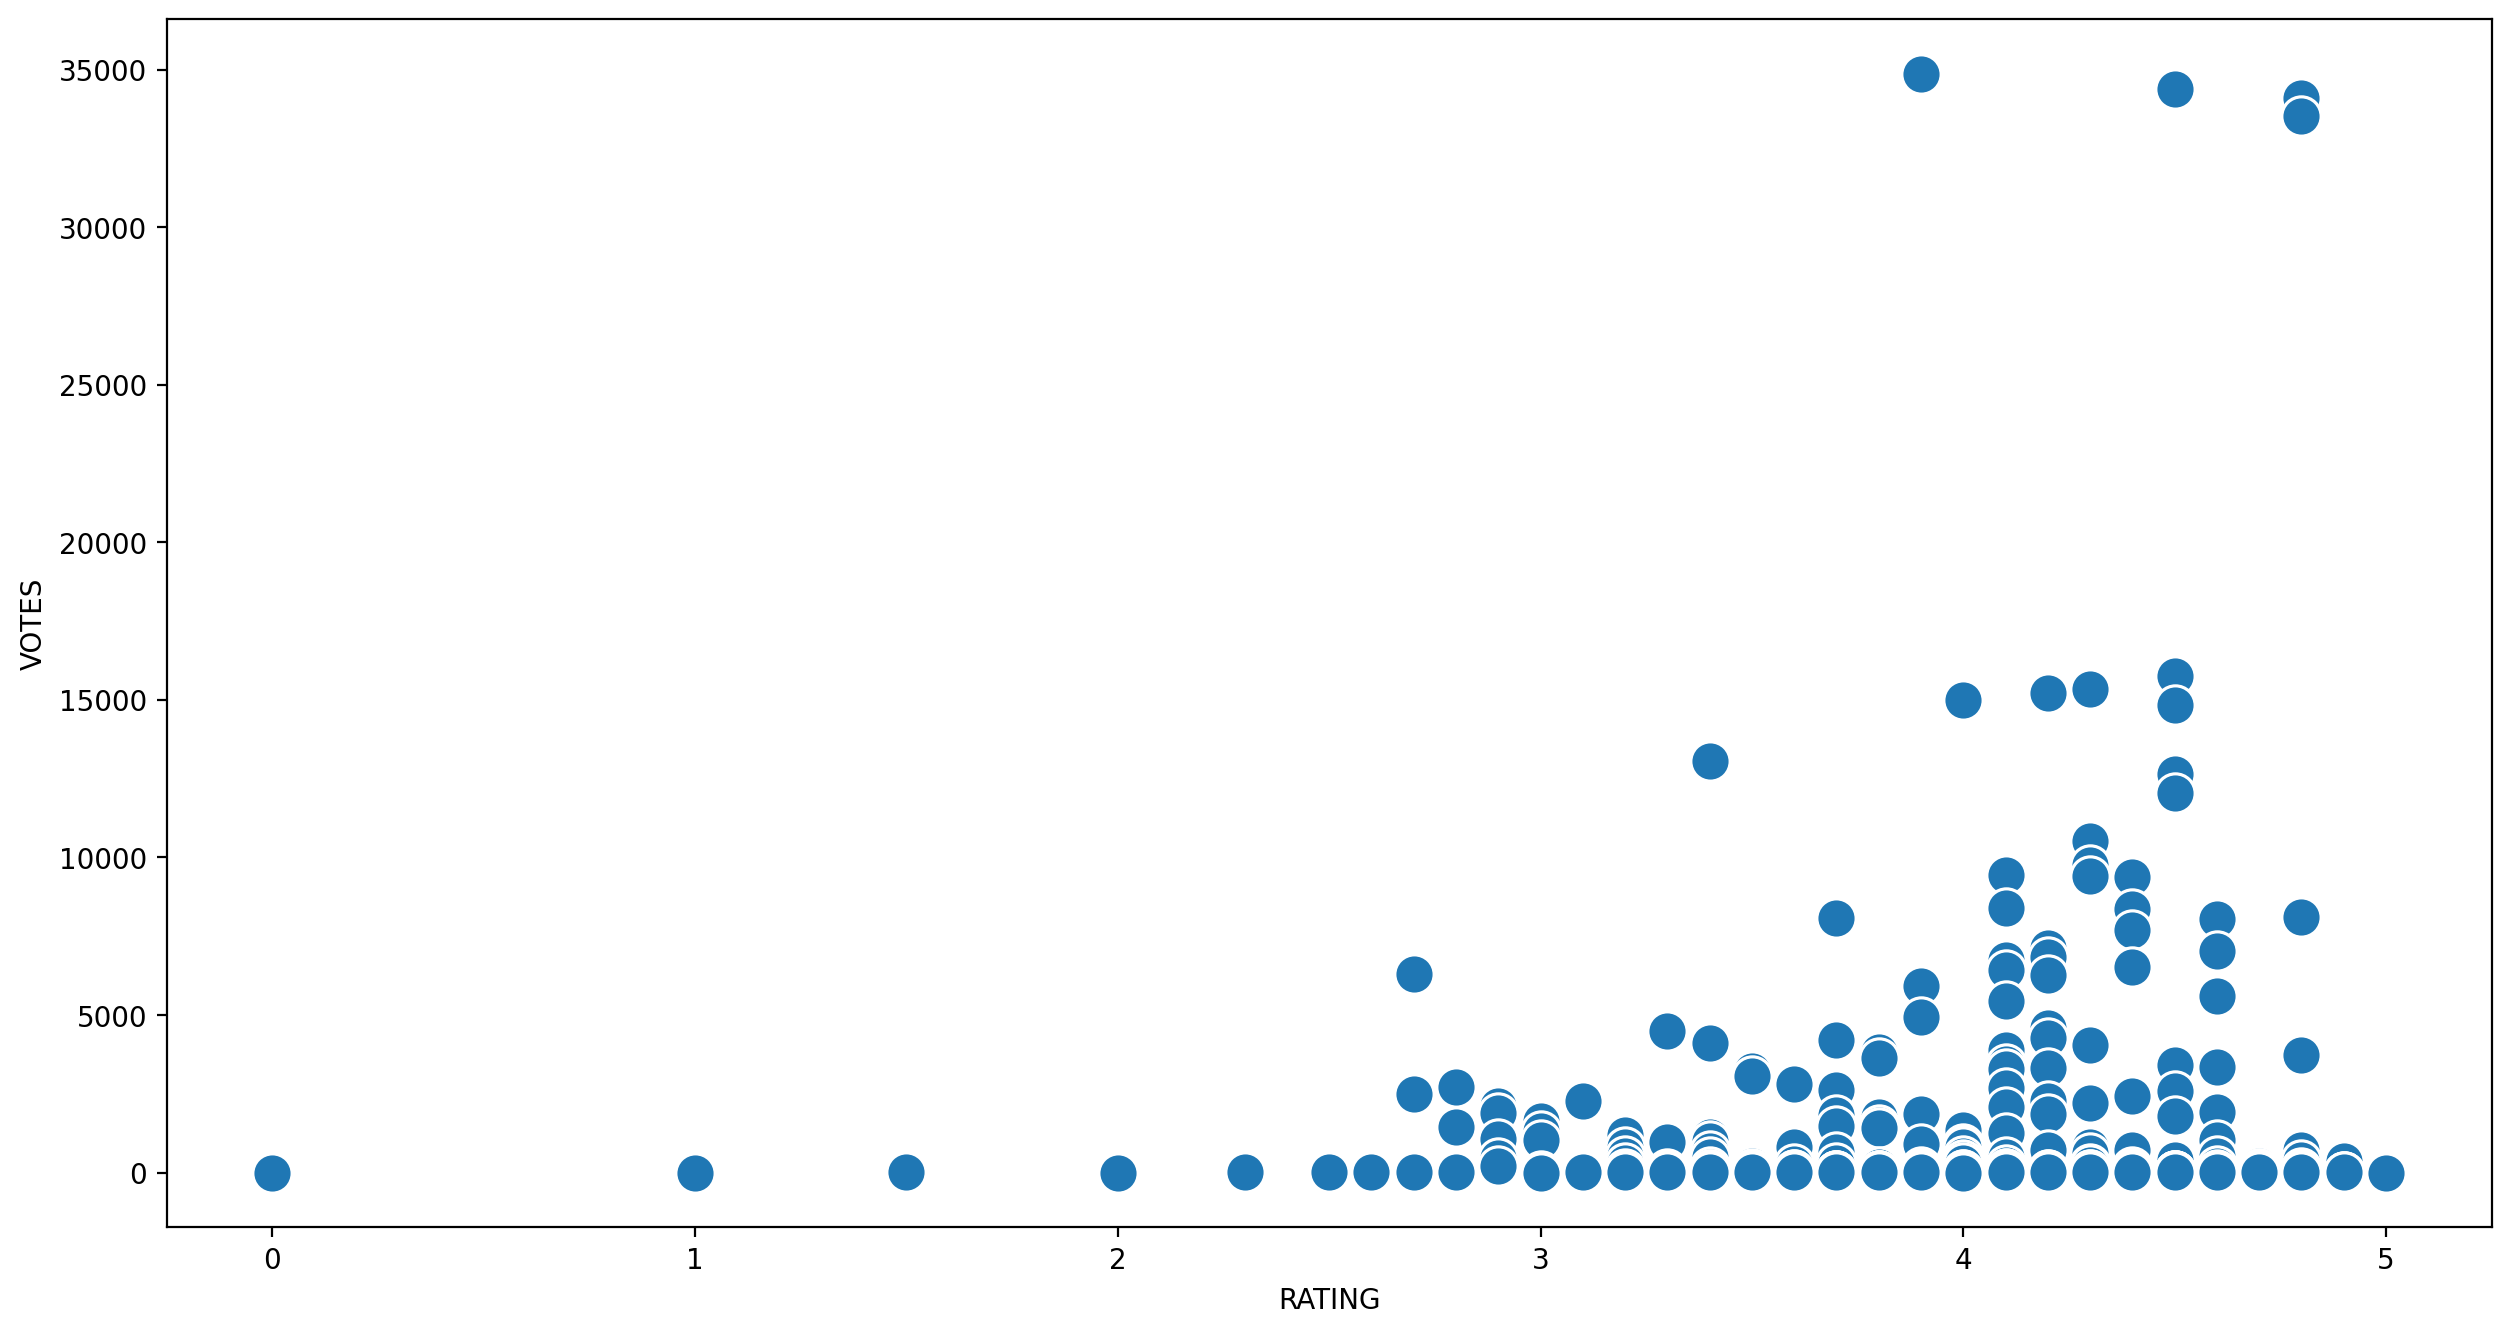

In [5]:
# Since a scatterplot is one of the plots suitable to show the relationship between values in your dataset, we will identify
# the relationship between the popularity of a film(VOTES) and its rating using a scatterplot
fig = plt.figure(dpi=200, figsize=(15,8))
sns.scatterplot(x='RATING', y='VOTES', data=fandango,s=200 )

In [7]:
#remove the parenthesis in the YEAR column
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])
fandango['YEAR'] = fandango['YEAR'].str.replace(')','').str.strip()
fandango.tail()

,FILM,STARS,RATING,VOTES,YEAR
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964
503,Zarafa (2012),0.0,0.0,0,2012


In [46]:
# Count how many movies we have in our dataset in each year 
count = fandango['YEAR'].value_counts()
count

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

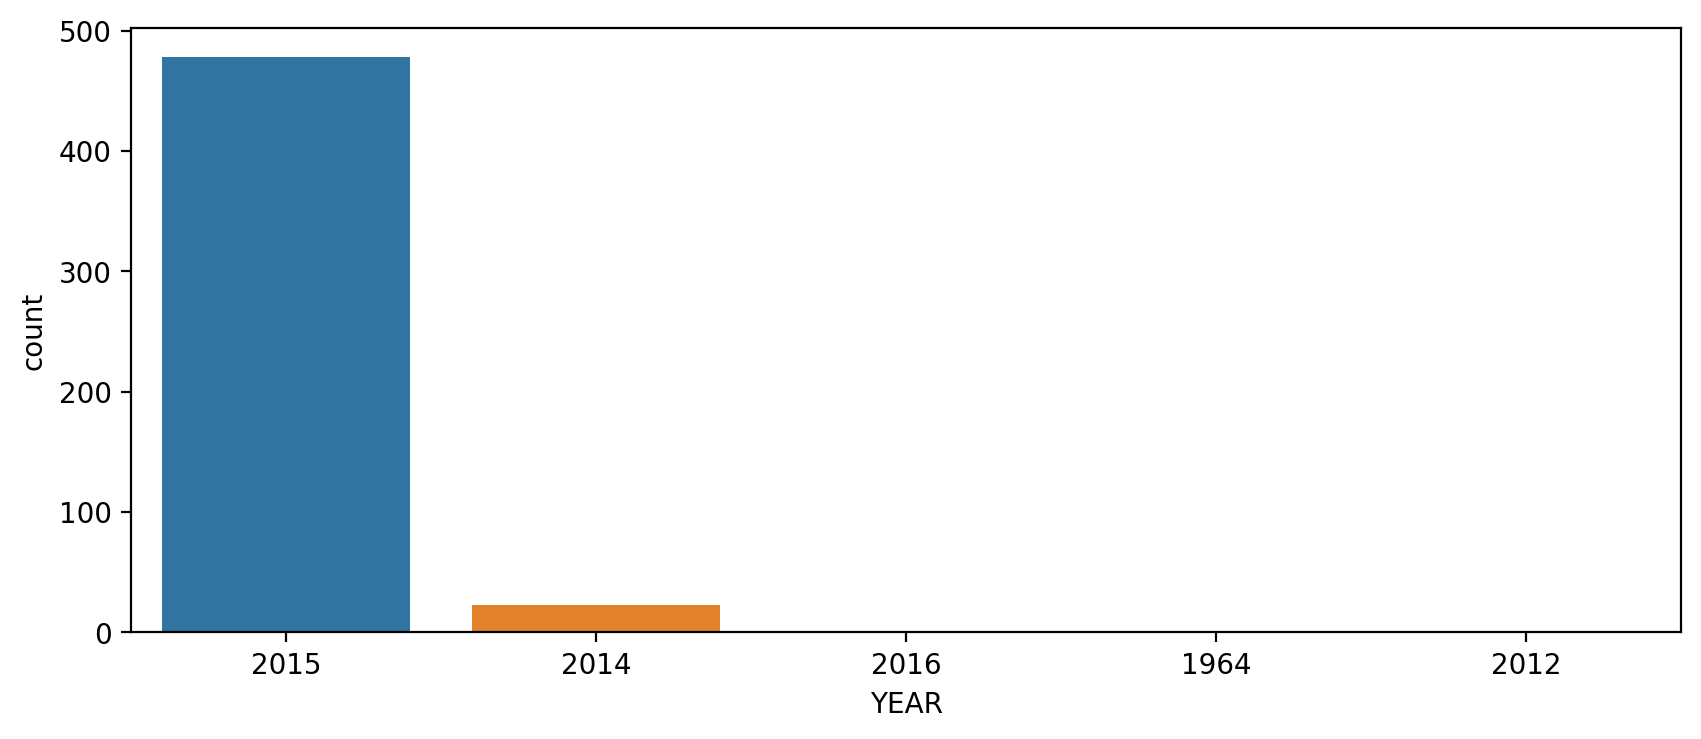

In [9]:
# A barchart to display the number of movies we have in a dataset in each year
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=fandango, x='YEAR')


In [10]:
# The movies with the largest popularity votes
fandango.sort_values('VOTES', ascending=False).iloc[1:10]
# fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [11]:
# calculate how many movies that have zero votes
zero_votes = (fandango['VOTES'] < 1).value_counts()
zero_votes[True]
# no_votes = fandango['VOTES']==0 
# no_votes.sum()

69

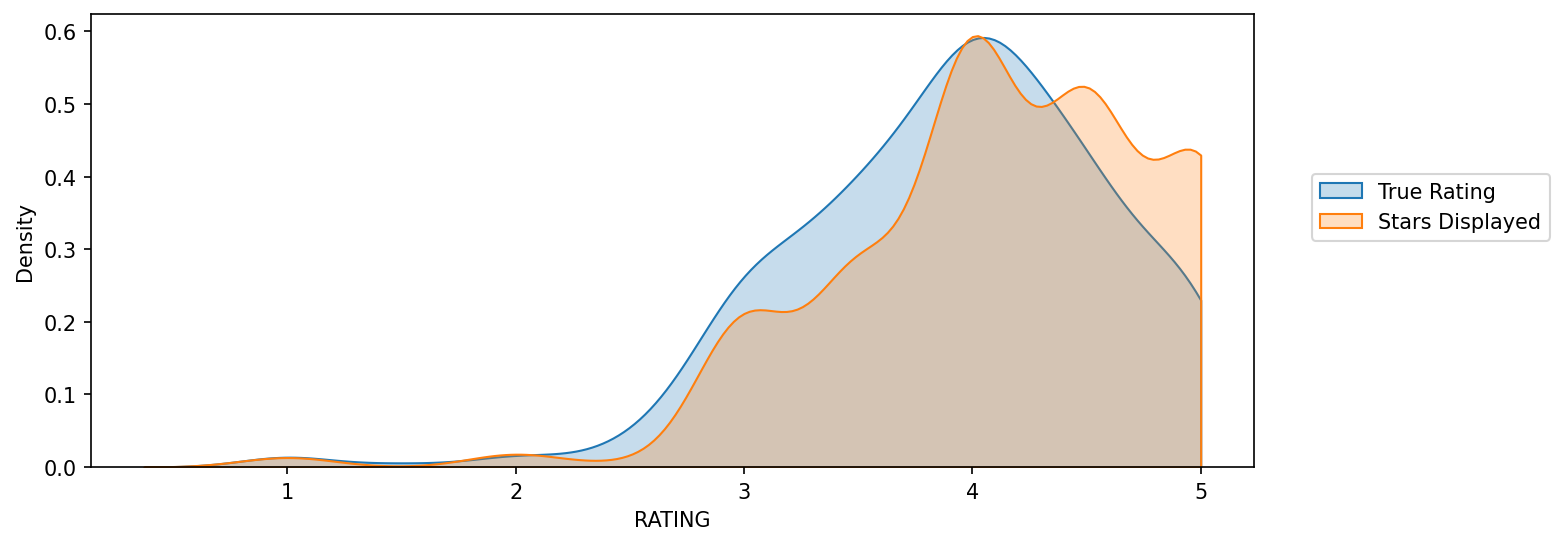

In [13]:
# Create a KDE plot (or multiple kdeplots) 
# that displays the distribution of ratings that are displayed (STARS) 
# versus what the true rating was from votes (RATING)
plt.figure(figsize=(10,4),dpi=150)


sns.kdeplot(data=greater_than_zero,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=greater_than_zero,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [18]:
# read the sites with the ratings and critic rating
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
# display the top five movies
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


(0.0, 100.0)

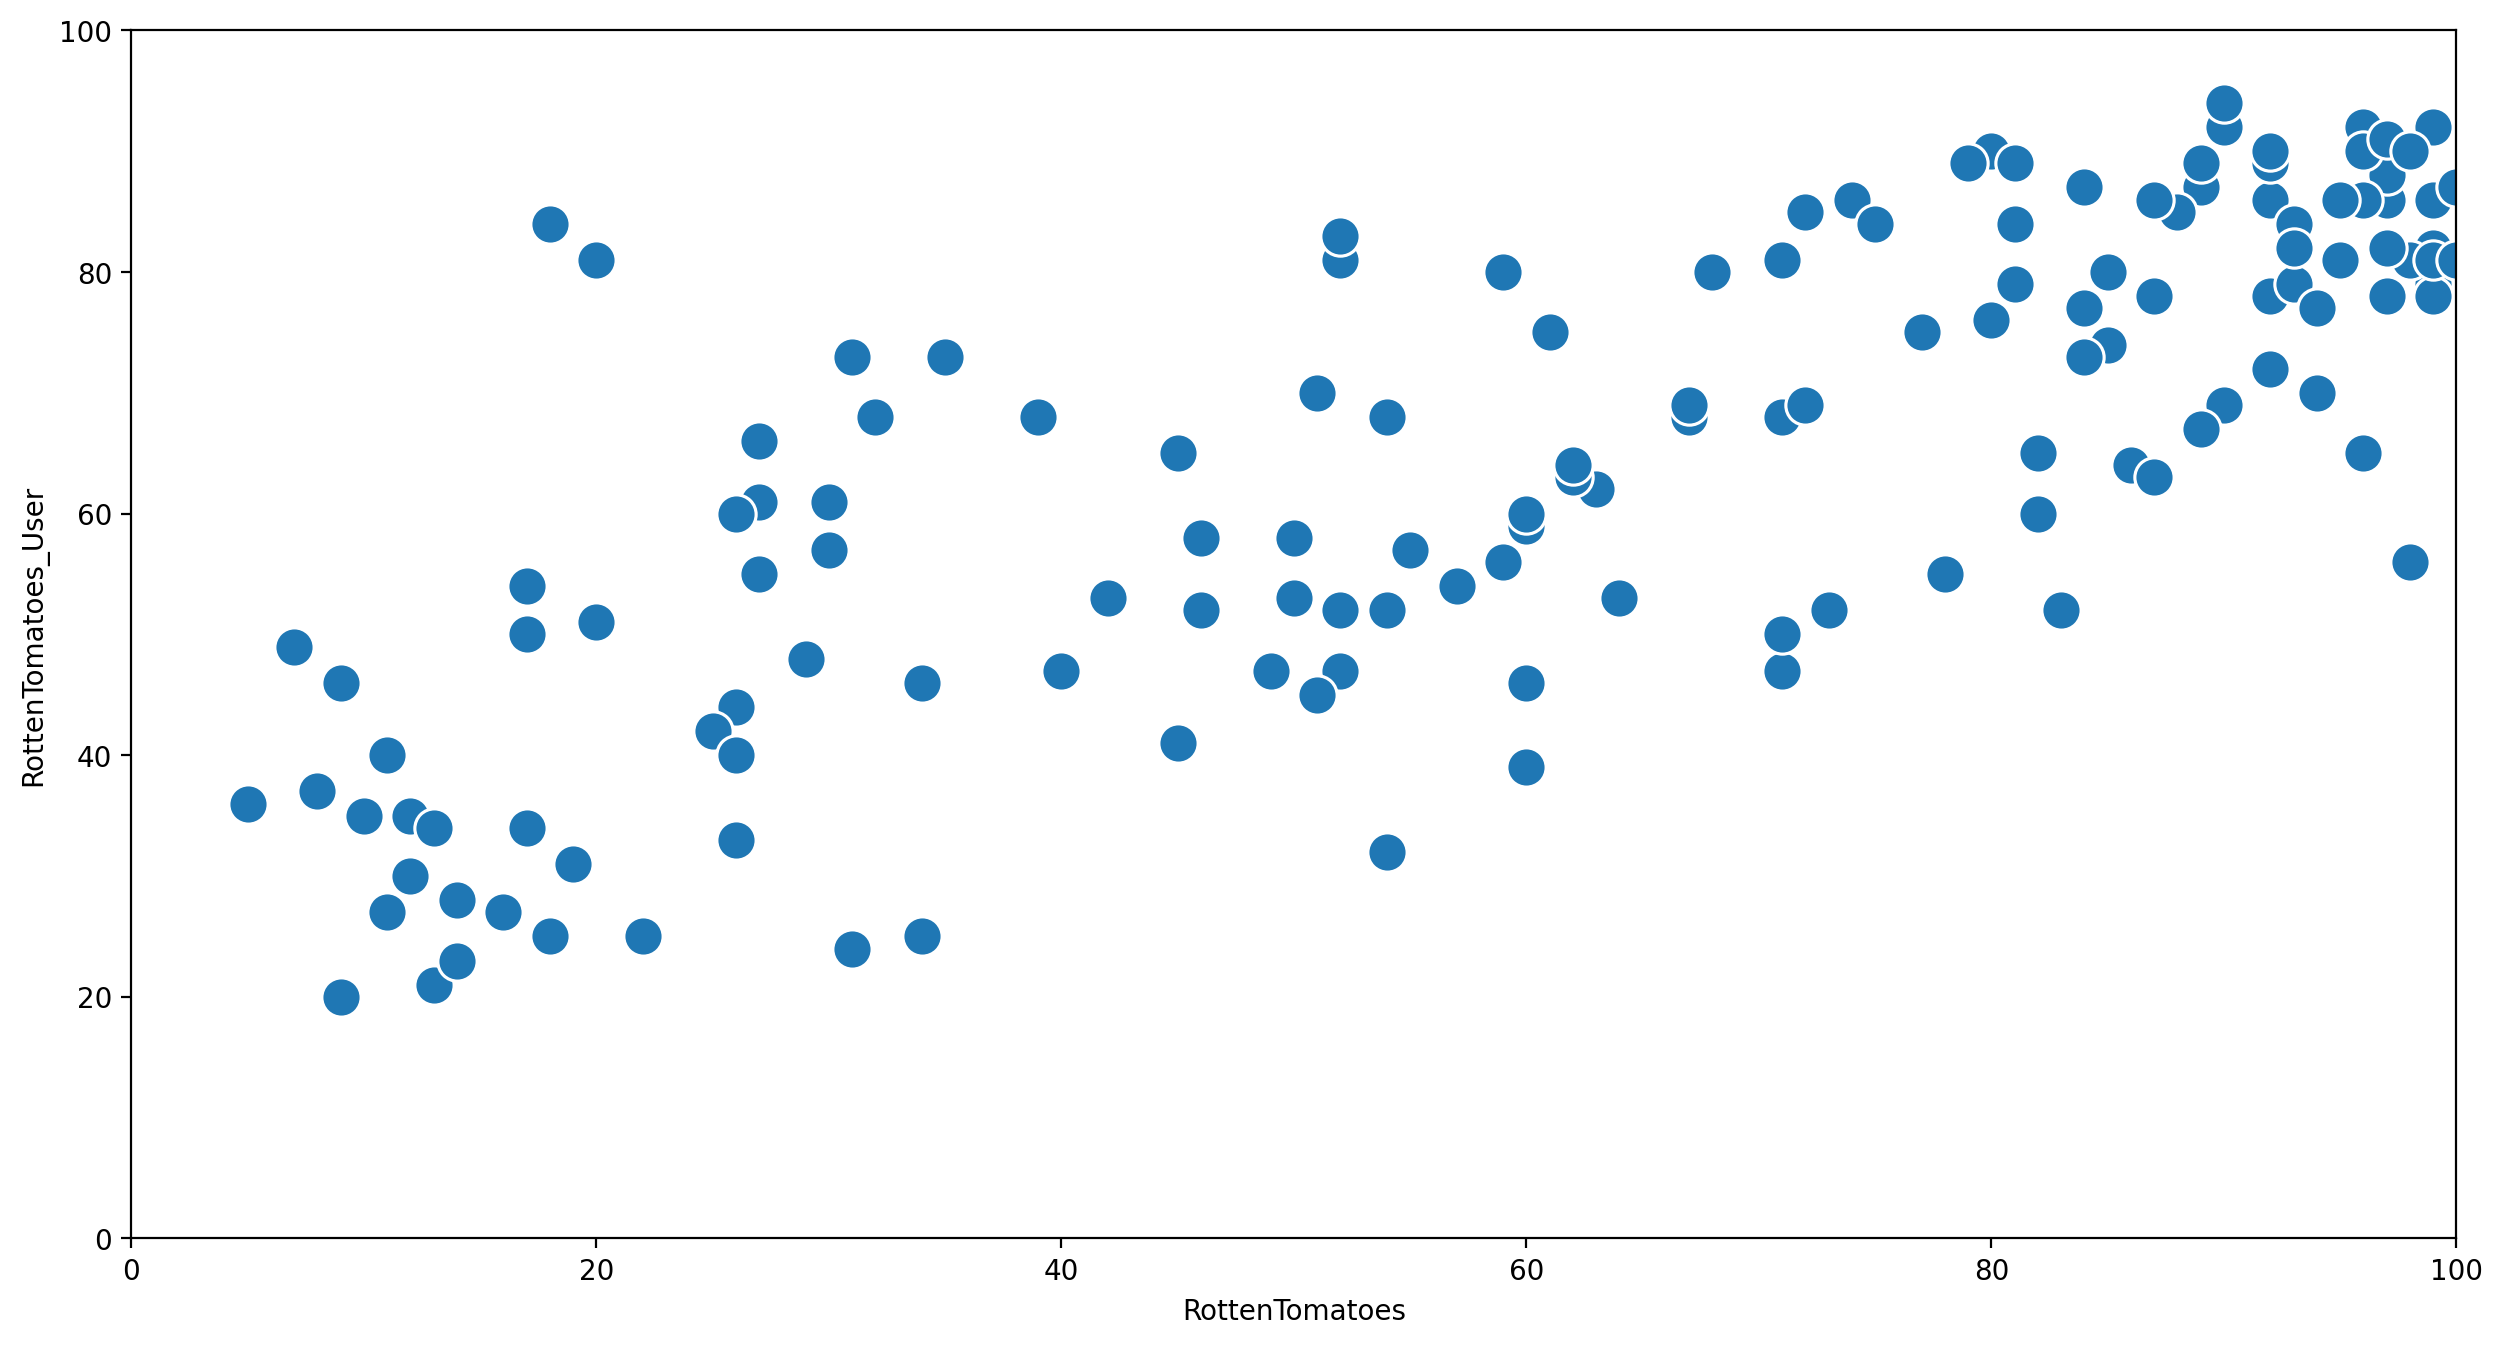

In [20]:
# Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.

fig = plt.figure(dpi=200, figsize=(15,8))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites,s=200)
plt.xlim(0,100)
plt.ylim(0,100)

In [22]:
# difference between the rotten tomato user sites rating and rotten tomato critics 

all_sites['Rotten_Diff']= all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [23]:
# calculate the Mean Absolute Difference between RT scores and RT User scores as described above.
#  first take the absolute value of all the differences, then take the mean
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<Figure size 7500x2000 with 0 Axes>

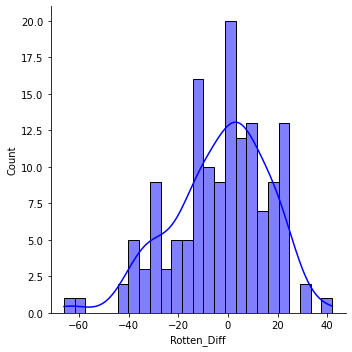

In [24]:
# Plot the distribution of the differences between RT Critics Score and RT User Score
# Using a histogram and a KDEplot to visualize this
plt.figure(figsize=(15,4),dpi=500)
sns.displot(x='Rotten_Diff', data=all_sites,color='blue', kde=True, bins=25)

In [ ]:
# What are the top 5 movies users rated higher than critics on average
# since you have calculated the difference between user ratings and the user critics 
top_five_rated = all_sites.nsmallest(n=5,columns='Rotten_Diff')
top_five_rated[['FILM','Rotten_Diff']] 

In [29]:
# What are the top 5 movies critics rated higher than user on average

top_five_rated = all_sites.nlargest(n=5,columns='Rotten_Diff')
top_five_rated[['FILM','Rotten_Diff']] 

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

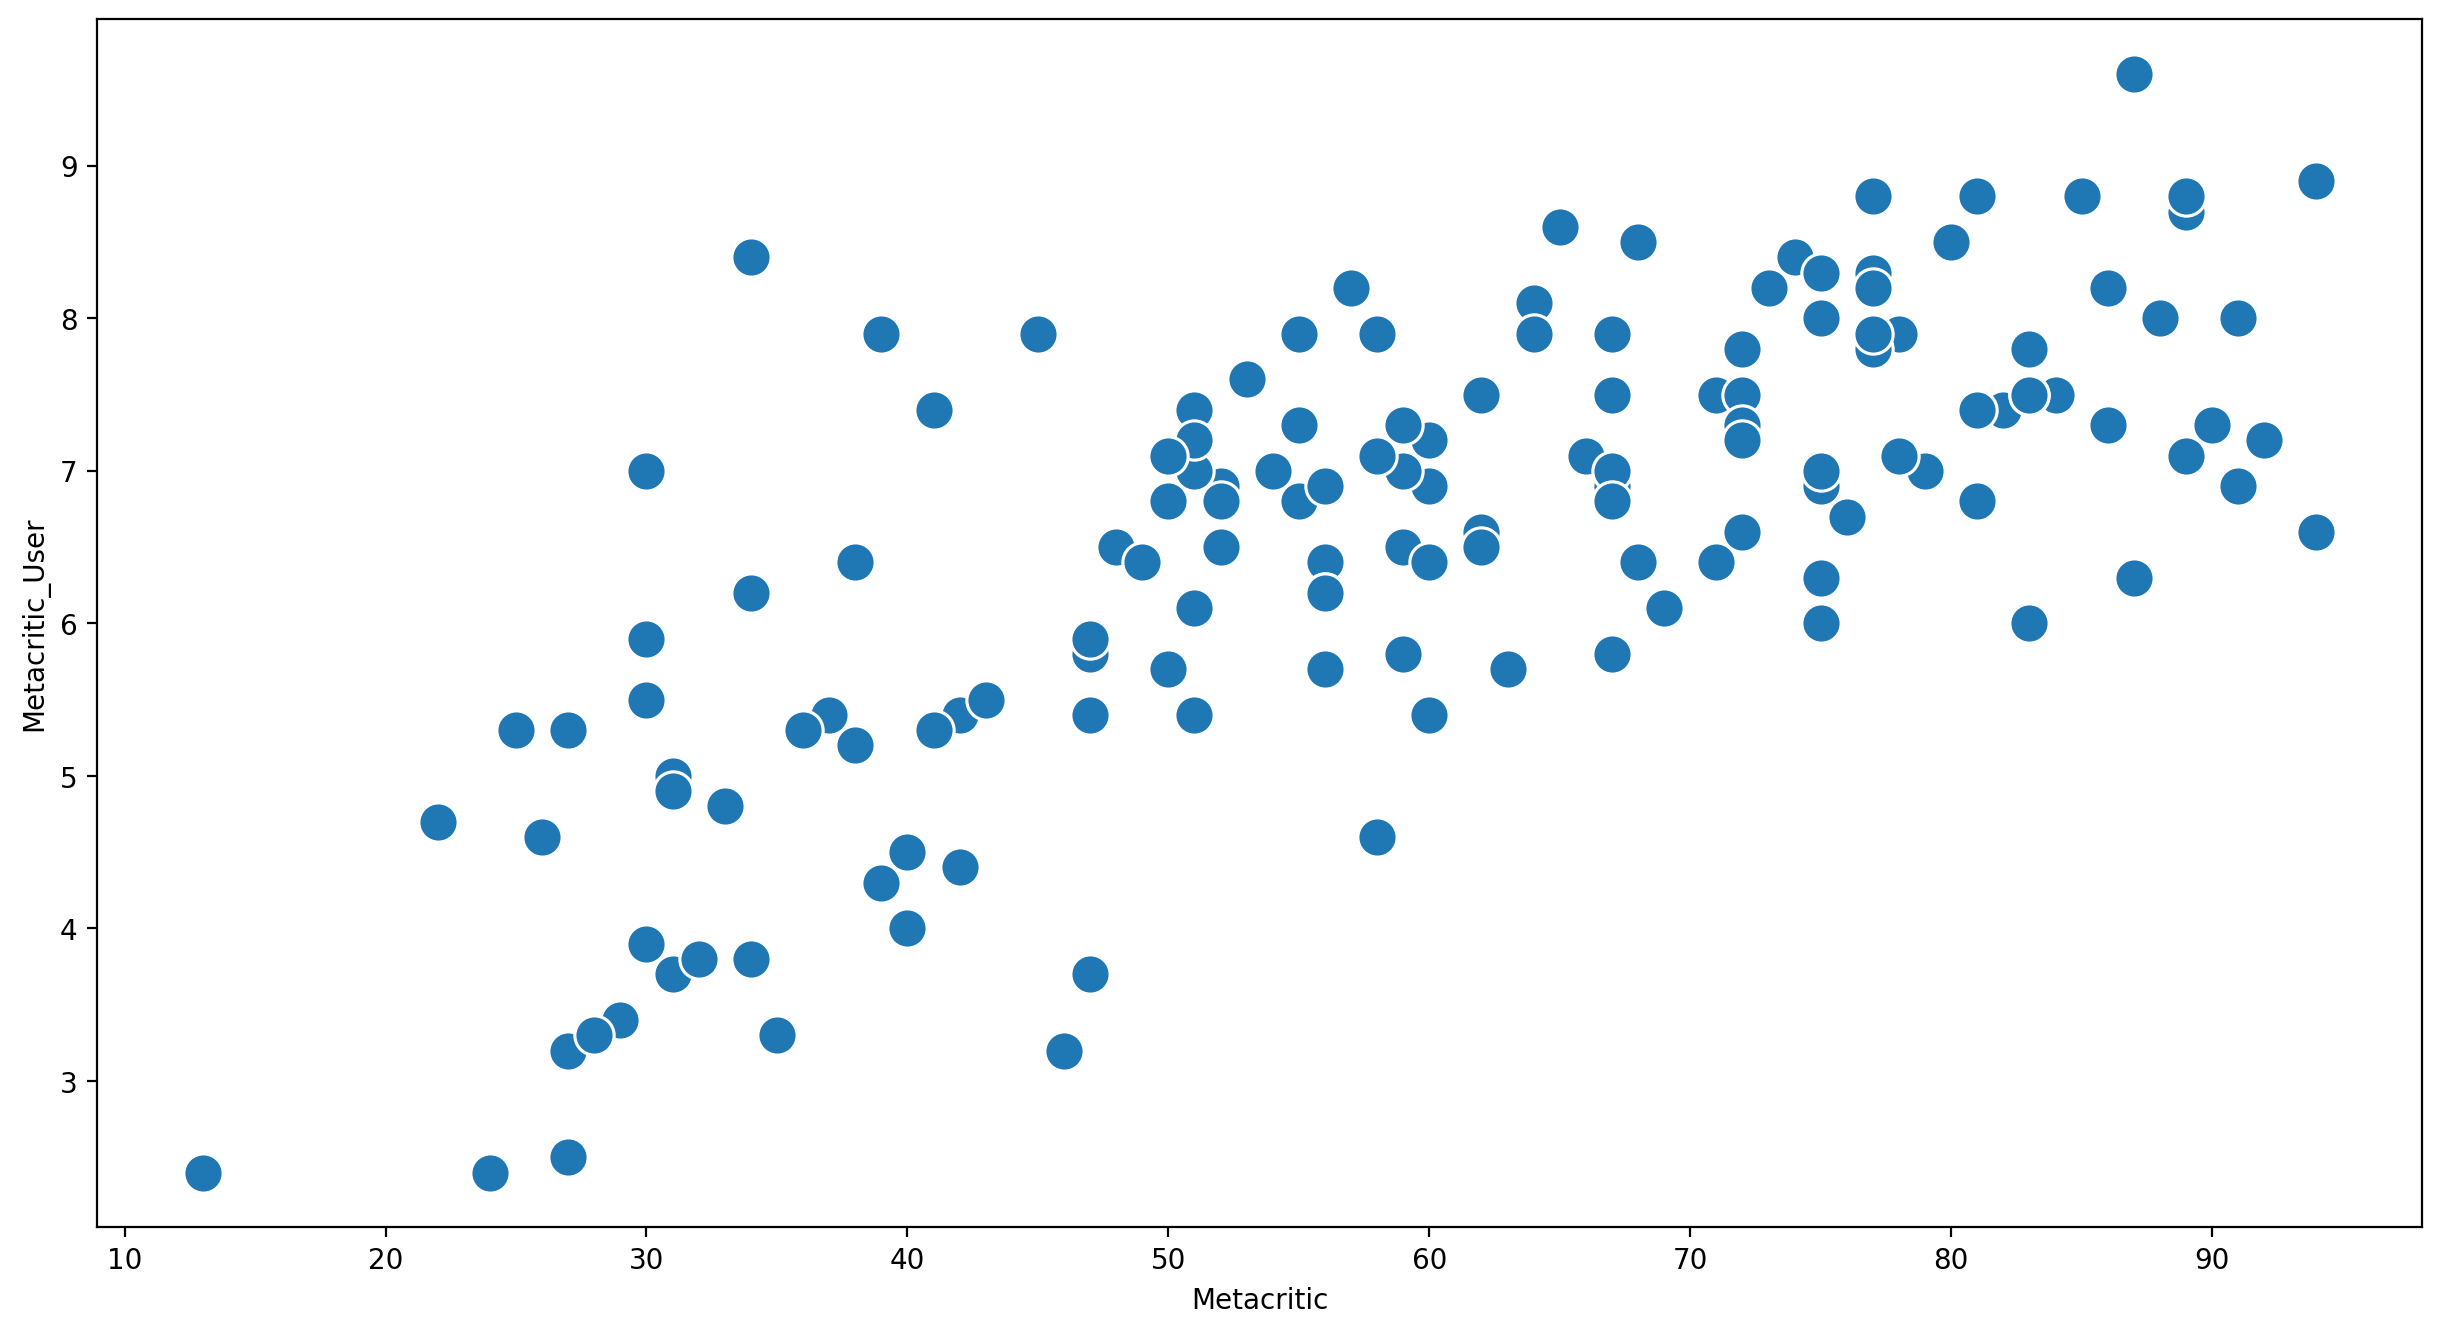

In [30]:
# Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.

fig = plt.figure(dpi=200, figsize=(15,8))
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites,s=200)


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

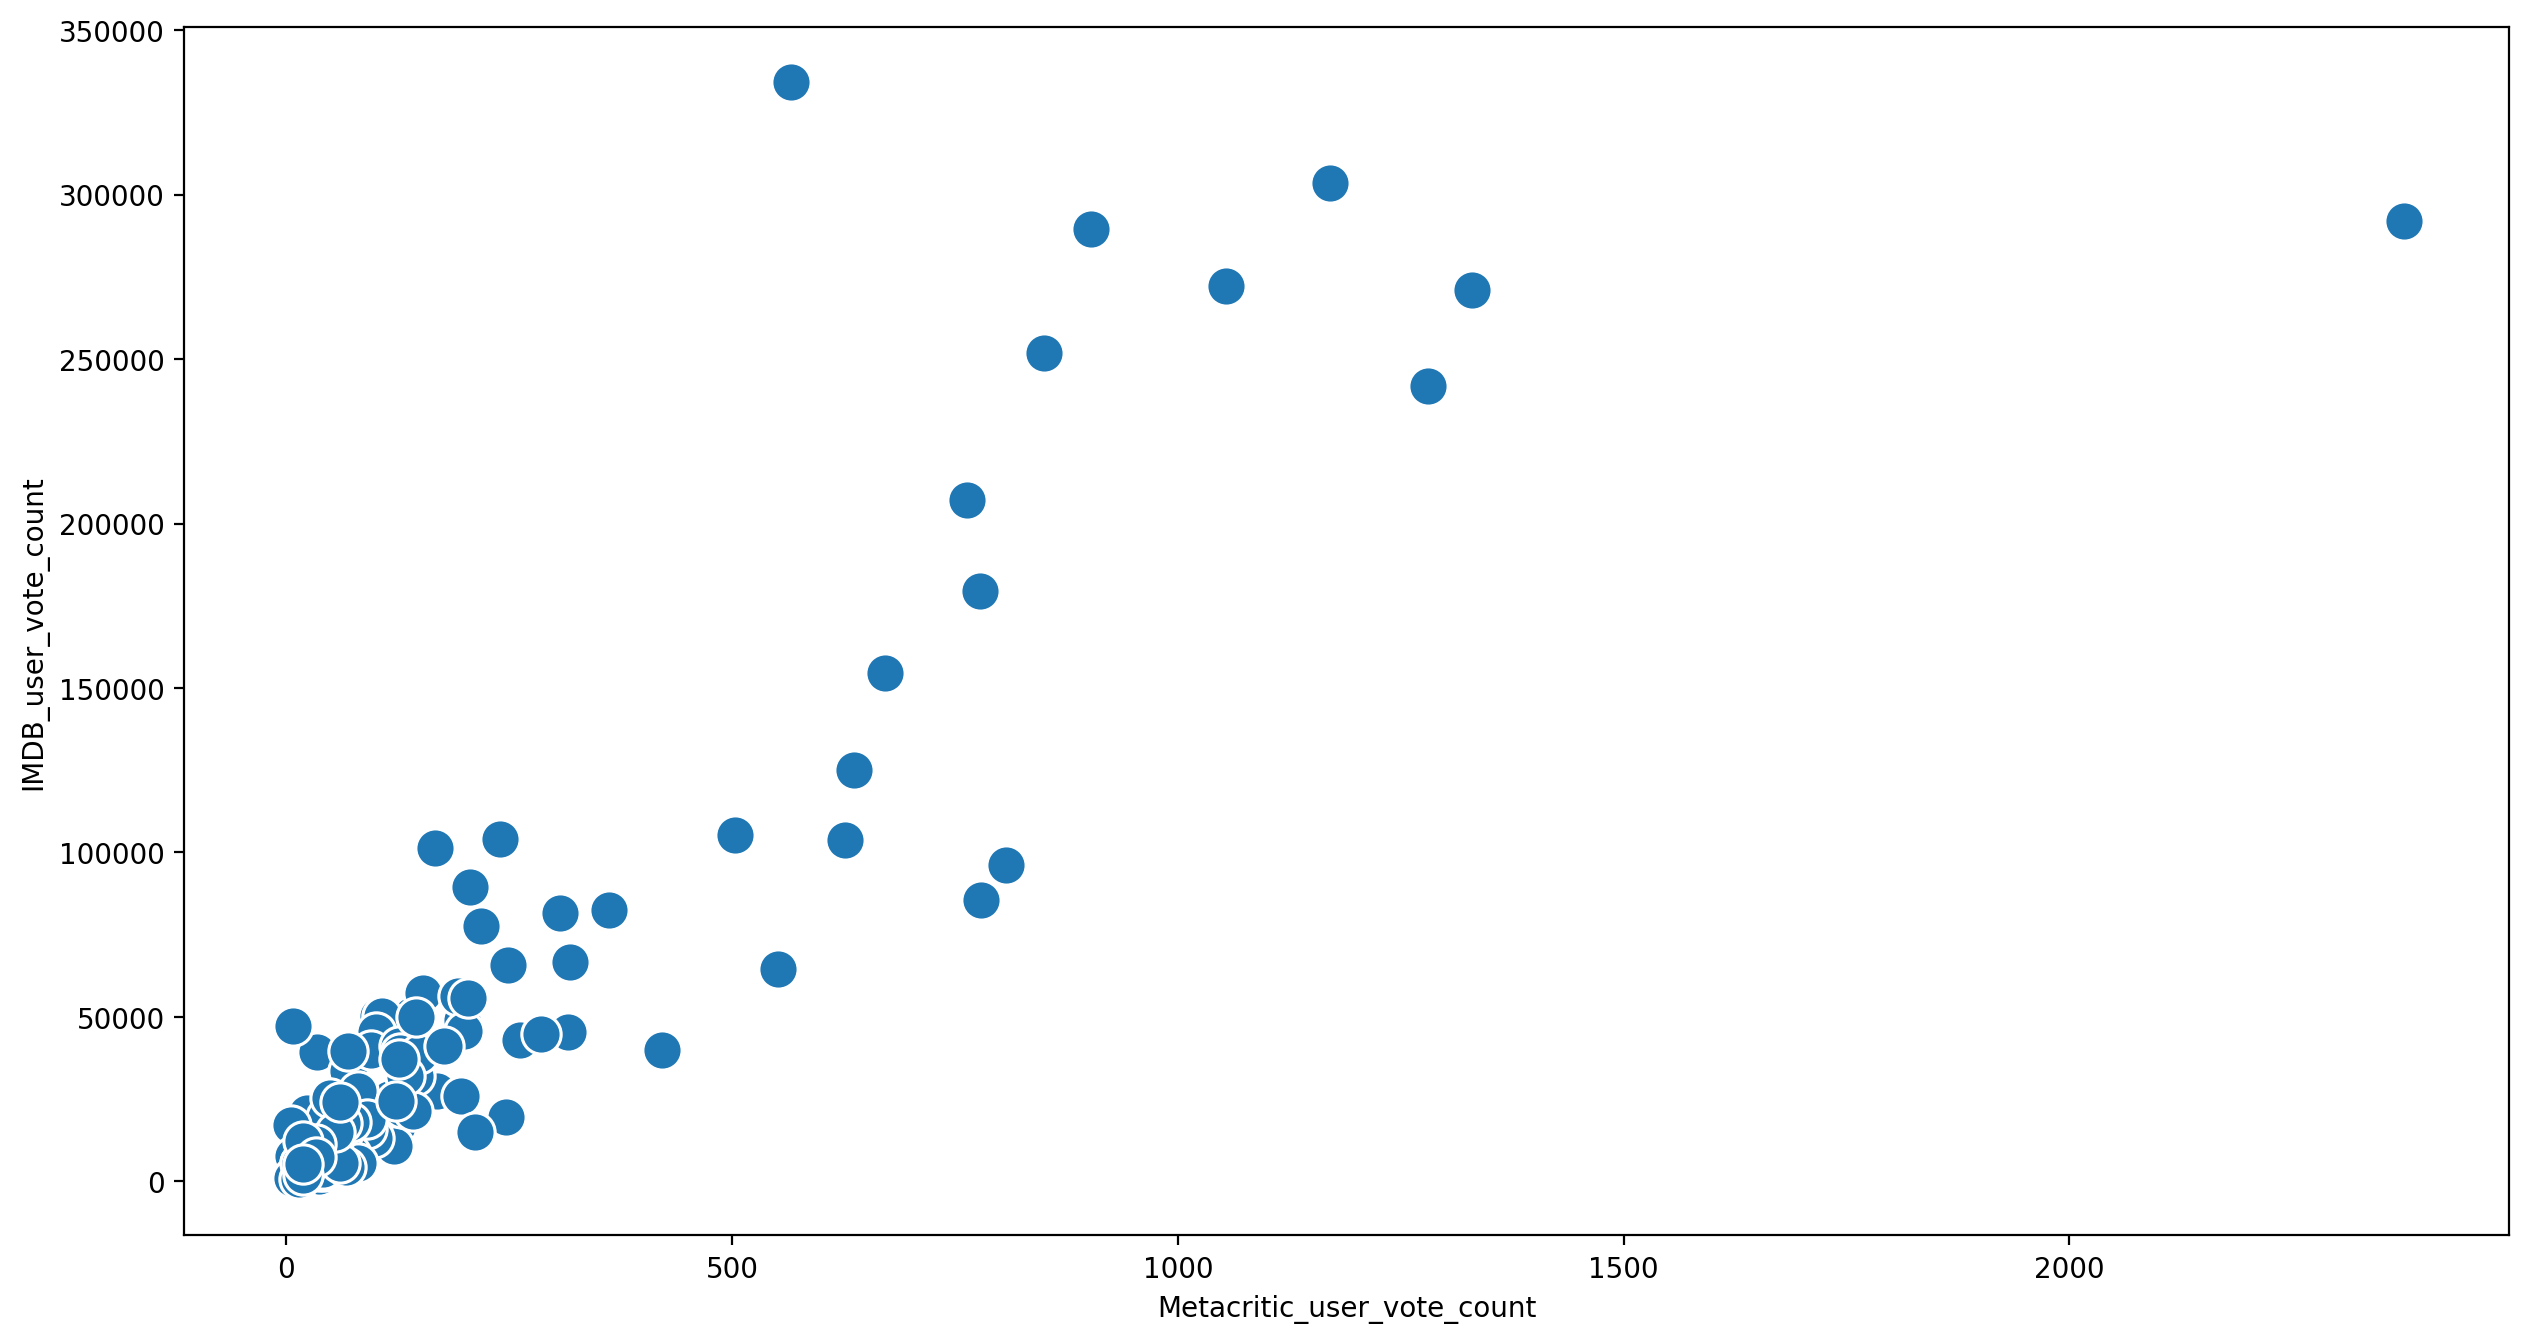

In [31]:
fig = plt.figure(dpi=200, figsize=(15,8))
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites,s=200)


In [32]:
# The movie with the highest IMDB user vote count

highest_IMDB_user_vote = all_sites.nlargest(n=1,columns='IMDB_user_vote_count')
highest_IMDB_user_vote

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [33]:
# The movie with the highest Metacritic User Vote count

highest_Metacritic_user_vote = all_sites.nlargest(n=1,columns='Metacritic_user_vote_count')
highest_Metacritic_user_vote


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [34]:
# Merging the the two datasets together using the common column name "INNER"

df = pd.merge(fandango,all_sites, how='inner', on= 'FILM').head()
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [50]:
# normalize columns for all ratings so they match up within the 0-5 star rating

df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [51]:
# normalize columns for all ratings so they match up within the 0-5 star rating
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [52]:

df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [59]:
# Display the normalized data from 0-5 star rating

normal_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
normal_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Here is the main solution. Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

This is a plot comparing the distributions of normalized ratings across all sites. 

In [54]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

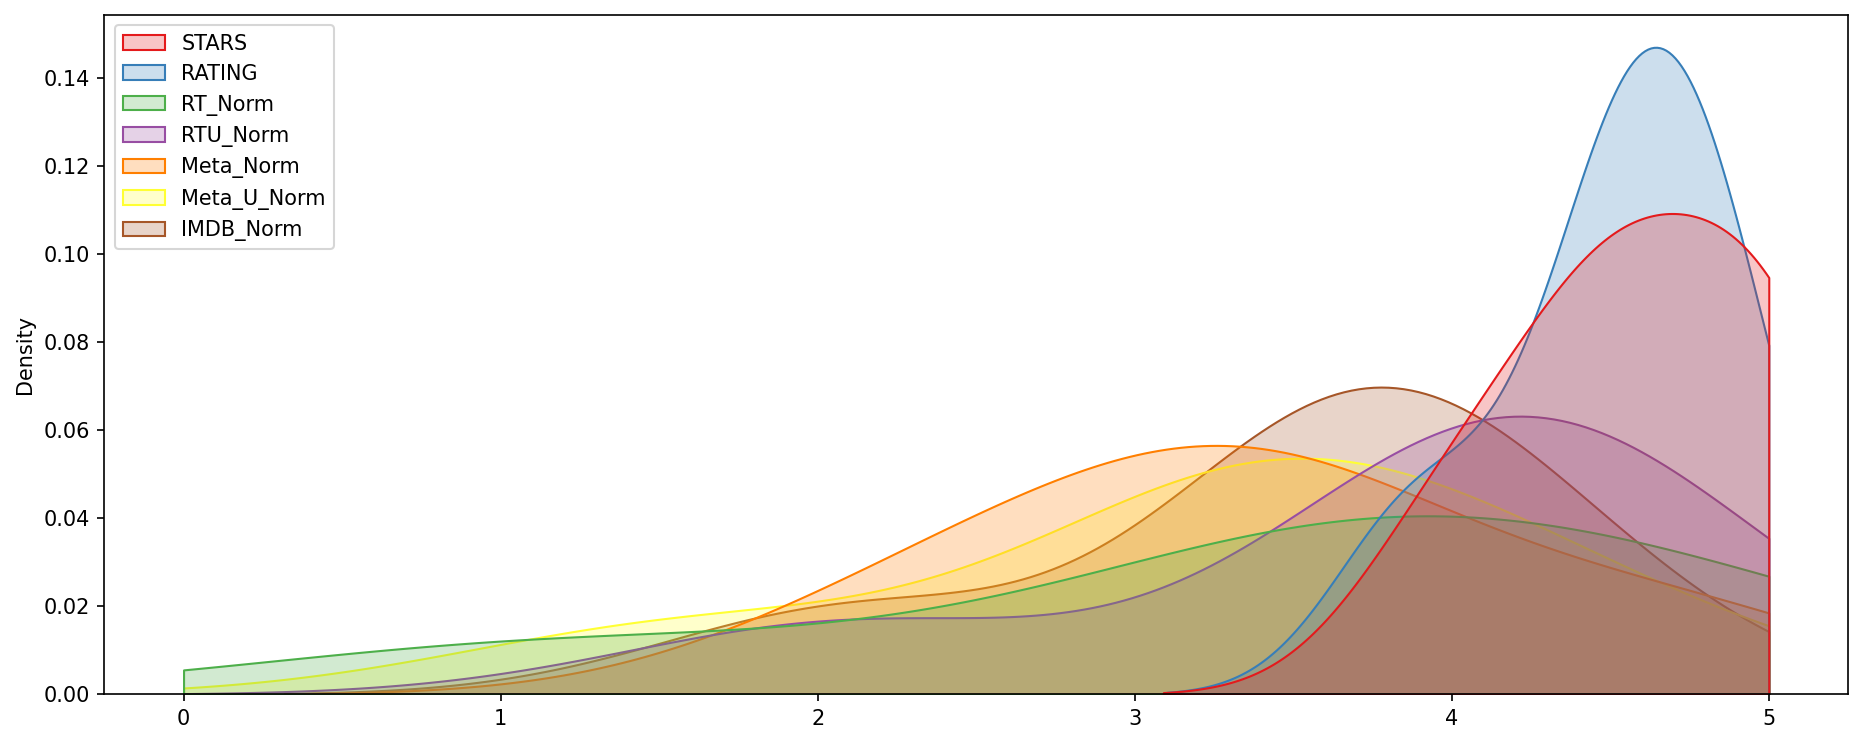

In [58]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=normal_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two

A KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.

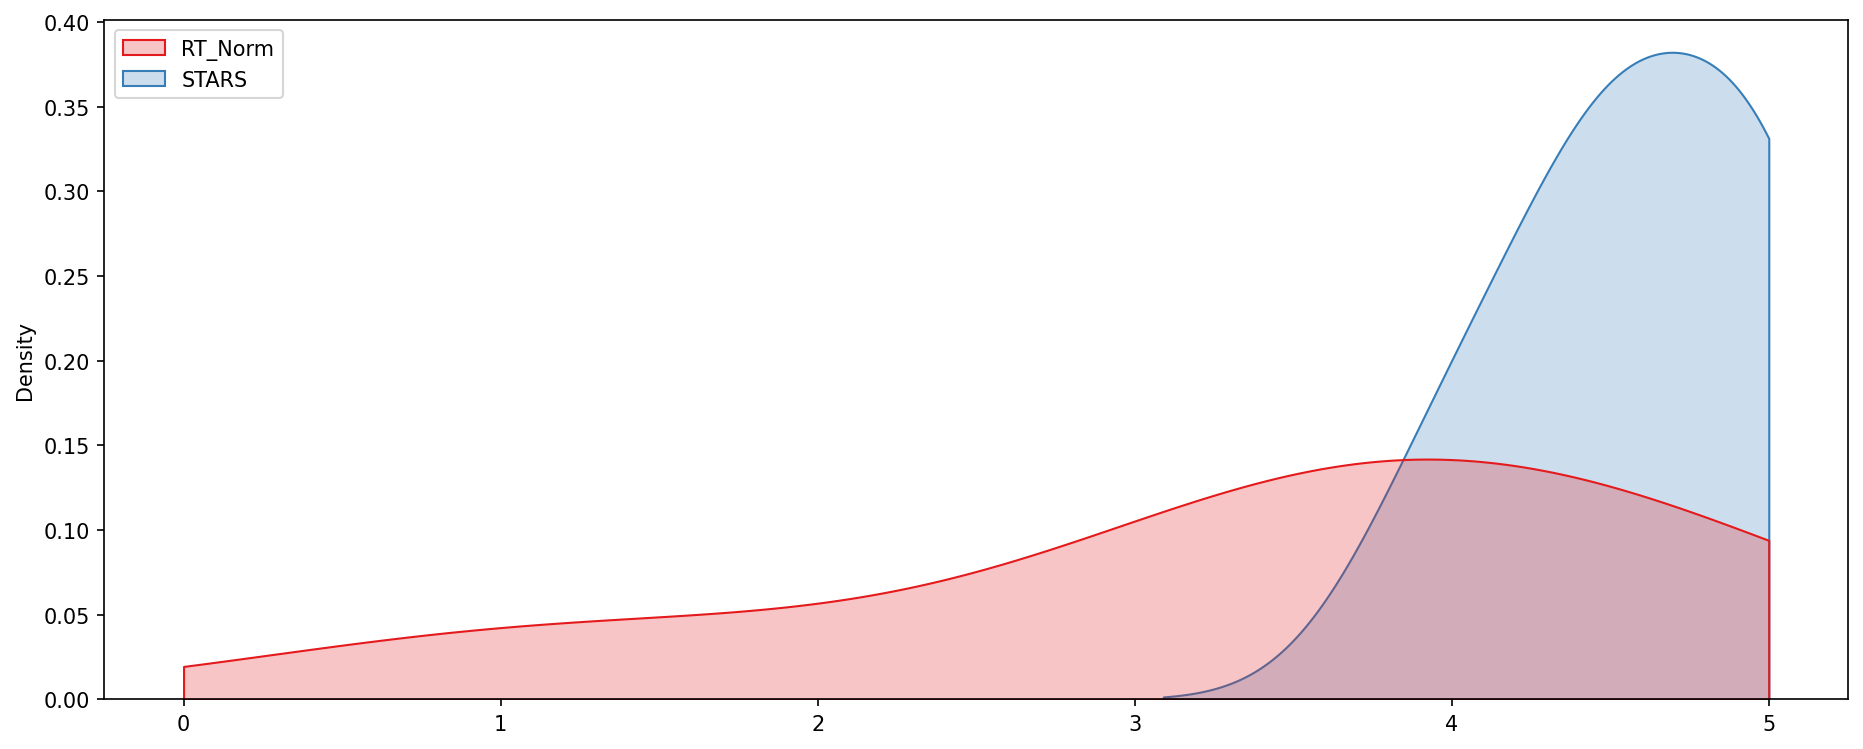

In [57]:
# This is a KDE plot comparing the distribution between rotten tomato user ratings and the artificial
# STARS displayed by fandango 
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=normal_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")